<img src="http://www.reeem.org/wp-content/uploads/2017/10/cropped-reeem-logo-transparent.png" width="300" style="float: left">
<img src="http://reiner-lemoine-institut.de//wp-content/uploads/2015/09/rlilogo.png" width="100" style="float: right">

# REEEM-DB - MESSAGE

__copyright__ 	= "© Reiner Lemoine Institut" <br>
__license__ 	= "GNU Affero General Public License Version 3 (AGPL-3.0)" <br>
__url__ 		= "https://www.gnu.org/licenses/agpl-3.0.en.html" <br>
__author__ 		= "Ludwig Hülk"

# Import

In [1]:
# basic
import sys
import os
import getpass
import pandas as pd
import numpy as np
import json
import pathlib
from sqlalchemy import *
# plot
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.graph_objs as go
import plotly.offline as pltly
import colorlover as cl
import seaborn as sns
# notebook
from IPython.display import Image
from IPython.core.display import HTML 

pltly.init_notebook_mode(connected=True)
%matplotlib inline

version = 'v0.2.0'
project = 'REEEM'

# Database Connection

This function creates a database connection to the **reeem_db**.<br>
The default user is **reeem_vis**, a user that has only read rights.

This section establishes the database connection and asks for the **password**.<br>
The username can be changed in the corresponding function above.<br>
If you don't have a username or forgot your password please contact your database admins.

In [2]:
def reeem_session():
    """SQLAlchemy session object with valid connection to reeem database"""
    
    print('Please provide connection parameters to database:\n' +
              'Hit [Enter] to take defaults')
    host = '130.226.55.43' # input('host (default 130.226.55.43): ')
    port = '5432' # input('port (default 5432): ')
    database = 'reeem' # input("database name (default 'reeem'): ")
    user = 'reeem_vis' # input('user (default postgres): ')
    # password = input('password: ')
    password = getpass.getpass(prompt='password: ',
                                   stream=sys.stderr)
    con = create_engine(
            'postgresql://' + '%s:%s@%s:%s/%s' % (user,
                                                  password,
                                                  host,
                                                  port,
                                                  database)).connect()
    print('Password correct! Database connection established.')
    return con

con = reeem_session()

D:\Anaconda3\envs\py36-reeem\lib\site-packages\ipykernel_launcher.py:12: UserWarning:

The `stream` parameter of `getpass.getpass` will have no effect when using ipykernel



Please provide connection parameters to database:
Hit [Enter] to take defaults
password: ········
Password correct! Database connection established.


# Table Info

In [3]:
# Database
schema = 'model_draft'
table_in = 'reeem_message_input'
table_out = 'reeem_message_output'
folder = 'message'

pathlib.Path('data/'+folder).mkdir(parents=True, exist_ok=True) 
print("Database Schema:", schema +'\n'+ "Input table:", table_in +'\n'+ 
      "Output table:", table_out +'\n'+ "Created folder:", folder )

Database Schema: model_draft
Input table: reeem_message_input
Output table: reeem_message_output
Created folder: message


## Database Query

This section is used to query the database tables (**table_in** and **table_out**).<br>

In [4]:
# Number of entries in table
sql = text("""
    SELECT  'In' AS data, count(*) AS count
    FROM    {0}.{1}
    UNION ALL
    SELECT  'Out' AS data, count(*) AS count
    FROM    {0}.{2}""".format(schema, table_in, table_out))
df_num = pd.read_sql_query(sql, con)
df_num

,data,count
0,In,102375
1,Out,10656


In [5]:
# Pathways
column = 'pathway' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3} 
    ORDER BY {3}; """.format(schema, table_in, table_out, column))
df_path = pd.read_sql_query(sql, con)
df_path

,data,pathway,count
0,In,Base,102375
1,Out,Base,10656


In [6]:
# Versions
column = 'pathway,version' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3} 
    ORDER BY {3}; """.format(schema, table_in, table_out, column))
df_ver = pd.read_sql_query(sql, con)
df_ver

,data,pathway,version,count
0,In,Base,DataV2,102375
1,Out,Base,DataV2,10656


In [7]:
# Years
column = 'year' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3} 
    ORDER BY {3} ; """.format(schema, table_in, table_out, column))
df_year = pd.read_sql_query(sql, con)
df_year

,data,year,count
0,In,2006,2275
1,In,2007,2275
2,In,2008,2275
3,In,2009,2275
4,In,2010,2275
5,In,2011,2275
6,In,2012,2275
7,In,2013,2275
8,In,2014,2275
9,In,2015,2275


In [8]:
# Regions
column = 'region' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3}
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3}; """.format(schema, table_in, table_out, column))
df_reg = pd.read_sql_query(sql, con)
df_reg

,data,region,count
0,In,EE,8145
1,In,LT,33885
2,In,LV,7110
3,In,FI,53235
4,Out,EE,2952
5,Out,LT,1584
6,Out,LV,1440
7,Out,FI,4680


In [9]:
# Categories
column = 'category' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3}; """.format(schema, table_in, table_out, column))
df_cat = pd.read_sql_query(sql, con)
df_cat

,data,category,count
0,In,Variable operation and maintenance cost RIGA ...,45
1,In,Technical lifetime Tartu CHPE_Tartu_GT_P_SAu_gen,45
2,In,Main output efficiency Eesti PP 8 Balti PP 11...,45
3,In,Construction time Existing and new steam turb...,45
4,In,Related output efficiency Existing and new st...,45
5,In,Related output Nuclear SMR KaunasN_KaAE_GT_K_...,45
6,In,Technical lifetime Daugavpils HPP2N_Dgpi_HE2v...,45
7,In,Technical lifetime Existing and new steam tur...,45
8,In,Variable cost biomass peat CHPEN_BiTE_GT_P_SA...,45
9,In,Construction time Existing and new steam turb...,45


In [10]:
# Indicators
column = 'nid,category,indicator' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3}
    ORDER BY category, indicator, nid; """.format(schema, table_in, table_out, column))
df_ind = pd.read_sql_query(sql, con)
df_ind.index.names = ['rid']
df_ind

,data,nid,category,indicator,count
rid,,,,,
0,In,71,Construction time Ahtme CHPE_Ahtm_GT_P_Sk_gen,E_Ahtm_GT_P_Sk_gen,45
1,In,477,Construction time All primary reserve availab...,EN_XX_Re1_HVN_RE_XX_XX_ava,45
2,In,476,Construction time All secondary reserve avail...,EN_XX_Re2_HVN_RE_XX_XX_ava,45
3,In,475,Construction time All tertiary reserve availa...,EN_XX_Re3_HVN_RE_XX_XX_ava,45
4,In,241,Construction time Alytus biomass CHPE_ALTE_GT...,E_ALTE_GT_P_S_gen,45
5,In,268,Construction time Alytus CHPN_Alyt_DT_P_Dd_gen,N_Alyt_DT_P_Dd_gen,45
6,In,273,Construction time Alytus CHPN_Alyt_GT_P_SiaS_gen,N_Alyt_GT_P_SiaS_gen,45
7,In,233,Construction time Alytus gas CHPE_ALTE_GT_P_D...,E_ALTE_GT_P_D_gen,45
8,In,235,Construction time Arvi CHPE_ArTE_GT_P_D_gen,E_ArTE_GT_P_D_gen,45


In [11]:
# Write data as CSV file
csvname = 'data/{0}/reeem_{0}_indicators.csv'.format(folder)
df_ind.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

Data saved to file: data/message/reeem_message_indicators.csv


## Table metadata

Access the metadata from the database tables and write metadata string as JSON file.<br>

In [12]:
# Input Metadata
sql = text("""SELECT obj_description('{0}.{1}'::regclass);""".format(schema, table_in))
meta_in = pd.read_sql_query(sql, con).loc[:,'obj_description'].iloc[0]
print(meta_in)

# Save data to JSON file
fname_in = 'data/{0}/{1}_metadata.json'.format(folder, table_in)
with open(fname_in, 'w') as metafile:
    json.dump(json.loads(meta_in), metafile, indent=4)
    print("Data saved to file:", fname_in)

{
    "title": "REEEM MESSAGE Input",
    "description": "Input parameters: Service Demands, Fuel Prices, Potentials",
    "language": [ "eng" ],
    "spatial": 
        {"location": "none",
        "extent": "Europe",
        "resolution": "Country"},
    "temporal": 
        {"reference_date": "2015",
        "start": "2015",
        "end": "2060",
        "resolution": "1 year"},
    "sources": [
        {"name": "none", "description": "none", "url": "none", "license": "none", "copyright": "none"},
        {"name": "none", "description": "none", "url": "none", "license": "none", "copyright": "none"} ],
    "license": 
        {"id": "none",
        "name": "none",
        "version": "none",
        "url": "none",
        "instruction": "none",
        "copyright": "none"},
    "contributors": [
        {"name": "Ludee", "email": "none", "date": "2019-01-22", "comment": "Create table and metadata"} ],
    "resources": [
        {"name": "model_draft.reeem_message_input",
        "for

In [13]:
# Output Metadata
sql = text("""SELECT obj_description('{0}.{1}'::regclass);""".format(schema, table_out))
meta_out = pd.read_sql_query(sql, con).loc[:,'obj_description'].iloc[0]
print(meta_out)

# Save data to JSON file
fname_out = 'data/{0}/{1}_metadata.json'.format(folder, table_out)
with open(fname_out, 'w') as metafile:
    json.dump(json.loads(meta_out), metafile, indent=4)
    print("Data saved to file:", fname_out)

{
    "title": "REEEM MESSAGE Output",
    "description": "Output parameters: ",
    "language": [ "eng" ],
    "spatial": 
        {"location": "none",
        "extent": "Europe (EU28+NO+CH)",
        "resolution": "Country"},
    "temporal": 
        {"reference_date": "2015",
        "start": "2015",
        "end": "2050",
        "resolution": "1 year"},
    "sources": [
        {"name": "MESSAGE", "description": "Model documentation", "url": "none", "license": "none", "copyright": "none"} ],
    "license": 
        {"id": "none",
        "name": "none",
        "version": "none",
        "url": "none",
        "instruction": "none",
        "copyright": "none"},
    "contributors": [
        {"name": "Ludee", "email": "none", "date": "2019-01-22", "comment": "Create table and metadata"} ],
    "resources": [
        {"name": "model_draft.reeem_message_output",
        "format": "PostgreSQL",
        "fields": [
            {"name": "id", "description": "Unique identifier", "unit":

# View 3: One indicator for all regions in one pathway over time

## Database Query

This section can be used to query one specific **indicator** for all regions from one database table (_table_).<br>
Indicators are identified by the **nid** (_filter 1_).<br>
Only **region** _EU28_ is excluded (_filter 2_).<br>
It is possible to select one specific **pathway** (_filter 3_) and one specific data **version** (_filter 4_).<br>
To querry additional coulmns from the database table add the names to the **SELECT** statement (_column_).<br>
The sortation is done by the **ORDER BY** (_sorting_).<br>
The result from the database is saved to a pandas.DataFrame (**df_3**) and can be printed.

In [14]:
# Database select (SQL)
sql = text("""
    SELECT  pathway, version, region, year, nid, schema, category, indicator, value, unit  -- column
    FROM    model_draft.reeem_plexos_input -- table
    WHERE nid = 1                                 -- filter 1
        AND pathway = 'Base'                      -- filter 2
        AND version = 'DataV1'                    -- filter 3
    ORDER BY pathway, version, region, year;      -- sorting """)
df_3 = pd.read_sql_query(sql, con)
#df_3

## Metadata

The important information from the above select (**df_3**) is collected in a Dictionary (**info_dict_3**).

In [15]:
# Facts dict
info_dict_3 = {}
info_dict_3['Filename'] = ['{0}_reeem_Plexos_allregions_{1}' .format(
    pd.to_datetime('today').strftime("%Y-%m-%d"),
    df_3.loc[:,'indicator'].unique()[0])]
info_dict_3['Category'] = df_3.loc[:,'category'].unique()
info_dict_3['Indicator'] = df_3.loc[:,'indicator'].unique()
info_dict_3['Unit'] = df_3.loc[:,'unit'].unique()
info_dict_3['Pathway'] = df_3.loc[:,'pathway'].unique()
info_dict_3['Year'] = df_3.loc[:,'year'].unique().tolist()
info_dict_3['Region'] = df_3.loc[:,'region'].unique()
info_dict_3['Y-Axis'] = ['{} in {}'.format(*info_dict_3['Indicator'], *info_dict_3['Unit'])]
info_dict_3['Title'] = ['{} in all regions'.format(*info_dict_3['Category'])]
info_dict_3['Metadata'] = meta_in

# Print facts
for x in info_dict_3:
    print(x,':',info_dict_3[x])

Filename : ['2019-07-15_reeem_Plexos_allregions_Electricity Demand']
Category : ['demand extraction ']
Indicator : ['Electricity Demand']
Unit : ['TWh']
Pathway : ['Base']
Year : [2030]
Region : ['BG' 'HR' 'HU' 'RO' 'SI']
Y-Axis : ['Electricity Demand in TWh']
Title : ['demand extraction  in all regions']
Metadata : {
    "title": "REEEM MESSAGE Input",
    "description": "Input parameters: Service Demands, Fuel Prices, Potentials",
    "language": [ "eng" ],
    "spatial": 
        {"location": "none",
        "extent": "Europe",
        "resolution": "Country"},
    "temporal": 
        {"reference_date": "2015",
        "start": "2015",
        "end": "2060",
        "resolution": "1 year"},
    "sources": [
        {"name": "none", "description": "none", "url": "none", "license": "none", "copyright": "none"},
        {"name": "none", "description": "none", "url": "none", "license": "none", "copyright": "none"} ],
    "license": 
        {"id": "none",
        "name": "none",
      

## Stack data

This pivot function reorganises the data and makes each pathway a column. The year is used as the index.<br>
The result is saved to a new dataframe (**df_3p**) and can be printed.

In [16]:
# Reshape dataframe
df_3p = df_3.pivot(index='region', columns='indicator',  values='value')
#df_3p

## Plot

This is a basic plot with [matplotlib](https://matplotlib.org/).<br>
The title and y-axis labels are taken from the **info_dict_3**. They can be exchanged with manual text.

D:\Anaconda3\envs\py36-reeem\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning:


The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.



(0, 53.59574977950043)

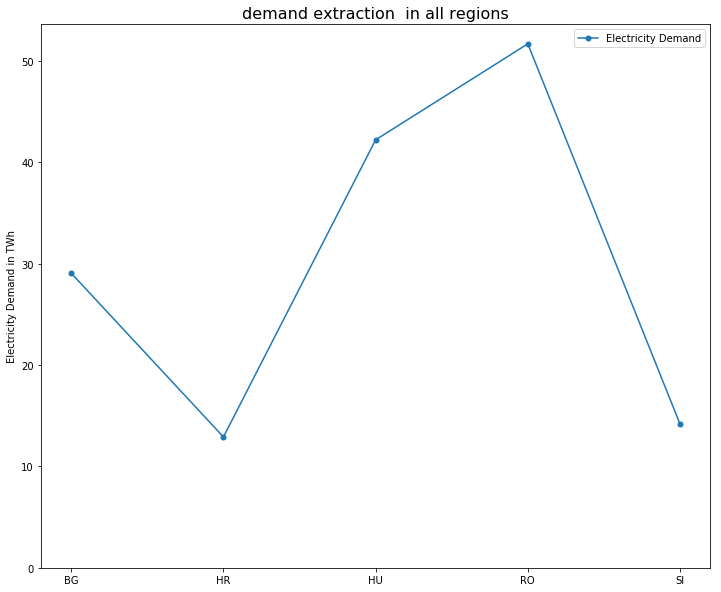

In [17]:
# Plot for one indicator and one pathway
fig = plt.figure(figsize=(12, 10))
ax = plt.subplot()
# plt.title(r'CO2-Emissions in all regions', fontsize=16)  # Manual title
plt.title(*info_dict_3['Title'], fontsize=16)         # Title from info
# plt.ylabel(r'CO2-Emissions in Mt')                # Manual label
plt.ylabel(*info_dict_3['Y-Axis'])                    # Label from info
plt.plot(df_3p, 
         marker="o",  markersize=5)
plt.legend(df_3p)
ax.set_ylim(ymin=0)

## Interactive Plot

This is a basic interactive plot with [Plotly](https://plot.ly/python/).<br>
You can hover over the elements of the plot and observe the data.<br>
The different pathways can be switched on and off.

In [ ]:
# Iterate over pathways and add to data
regions = df_3.loc[:,'region'].unique()
data = []
for region in regions:
    data.append(go.Scatter(
        x = df_3.loc[df_3['region'] == region].loc[:,'region'],
        y = df_3.loc[df_3['region'] == region].loc[:,'value'],
        name = region))

# Set layout
layout = go.Layout(
    height=800, width = 800,
    #title='CO2-Emissions in EU28',
    title=''.join(info_dict_3['Title']),
    # yaxis=dict(title='CO2-Emissions in Mt') )
    yaxis=dict(title=''.join(info_dict_3['Y-Axis'])) )
ifig = go.Figure(data=data, layout=layout)
pltly.iplot(ifig)

## Save results to files

The results are saved to cooresponding files in a folder named **data**.<br>
The **info_dict** is saved to a text file (txt).<br>
The **data** is saved to a table (csv).<br>
The **plot** is saved as an image (png).<br>
The **interactive plot** is saved as a webpage (html). It will also open in a new tab of your browser.<br>

In [ ]:
# Write facts to textfile
filename = ('data/{}.txt').format(*info_dict_3['Filename'])
with open(filename,'w') as tfile:
    for i in info_dict_3.keys():
        tfile.write(i + ": " + ', '.join([str(x) for x in info_dict_3[i]]) + "\n")
tfile.close()
print("Facts saved to file:", filename)

# Save data to CSV
csvname = 'data/{}.csv' .format(*info_dict_3['Filename'])
df_3.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

# Save pivot data to CSV
csvname = 'data/{}_pivot.csv' .format(*info_dict_3['Filename'])
df_3p.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

# Save plot as file
plotname = 'data/{}.png' .format(*info_dict_3['Filename'])
fig.savefig(plotname, bbox_inches='tight')
print("Plot saved to file:", plotname)

# Save interactive plot
htmlname = 'data/{}.html' .format(*info_dict_3['Filename'])
pltly.plot(ifig, filename=htmlname)
print("Interactive plot saved to file:", htmlname)

# View 4: All indicators for one region in one pathway over time

## Database Query

This section can be used to query all **indicators** for one **region** (_filter 2_) from one database table (_table_).<br>
Indicators are identified by the **nid**.<br>
It is possible to select one specific **pathway** (_filter 3_) and one specific data **version** (_filter 4_).<br>
To querry additional coulmns from the database table add the names to the **SELECT** statement (_column_).<br>
The sortation is done by the **ORDER BY** (_sorting_).<br>
The result from the database is saved to a pandas.DataFrame (**df_4**) and can be printed.

In [ ]:
# Database select (SQL)
sql = text("""
    SELECT  pathway, version, region, year, nid, indicator, category, value, unit  -- column
    FROM    model_draft.reeem_plexos_input
    WHERE   category = 'Installed Generation Capacities'
        AND region = 'BG'
        AND pathway = 'Base'
        AND version = 'DataV1'
    ORDER BY pathway, version, year, region, nid; """)
df_4 = pd.read_sql_query(sql, con)
#print(df_4)

## Metadata

The important information from the above select (**df_4**) is collected in a Dictionary (**info_dict_4**).

In [ ]:
# Facts dict
info_dict_4 = {}
info_dict_4['Filename'] = ['{0}_reeem_Plexos_allindicators_{1}' .format(
    pd.to_datetime('today').strftime("%Y-%m-%d"),
    df_4.loc[:,'region'].unique()[0])]
info_dict_4['Category'] = df_4.loc[:,'category'].unique()
info_dict_4['Indicator'] = df_4.loc[:,'indicator'].unique()
info_dict_4['Unit'] = df_4.loc[:,'unit'].unique()
info_dict_4['Pathway'] = df_4.loc[:,'pathway'].unique()
info_dict_4['Year'] = df_4.loc[:,'year'].unique().tolist()
info_dict_4['Region'] = df_4.loc[:,'region'].unique()
info_dict_4['Y-Axis'] = ['{} in {}'.format(*info_dict_4['Category'],*info_dict_4['Unit'])]
info_dict_4['Title'] = ['{} in region {}'.format(*info_dict_4['Category'],*info_dict_4['Region'])]
info_dict_4['Metadata'] = meta_in

# Print facts
for x in info_dict_4:
    print(x,':',info_dict_4[x])

## Stack data

This pivot function reorganises the data and makes each year a column. The indicator is used as the index.<br>
The result is saved to a new dataframe (**df_4p**) and can be printed.

In [ ]:
# Reshape dataframe
df_4p = df_4.pivot(index='indicator', columns='region',  values='value')
#df_4p

## Plot

This is a basic plot with [matplotlib](https://matplotlib.org/).<br>
The title and y-axis labels are taken from the **info_dict_4**. They can be exchanged with manual text.

In [ ]:
# Plot for one indicator and one pathway
fig = plt.figure(figsize=(12, 10))
ax = plt.subplot()
# plt.title(r'All indicators in region {}', fontsize=16)   # Manual title
plt.title(*info_dict_4['Title'], fontsize=16)         # Title from info
# plt.ylabel(r'CO2-Emissions in Mt')                # Manual label
plt.ylabel(*info_dict_4['Y-Axis'])                    # Label from info
plt.plot(df_4p, 
         marker="o",  markersize=5)
plt.legend(df_4p)
ax.set_ylim(ymin=0)

## Interactive Plot

This is a basic interactive plot with [Plotly](https://plot.ly/python/).<br>
You can hover over the elements of the plot and observe the data.<br>
The different pathways can be switched on and off.

In [ ]:
# Iterate over pathways and add to data
indicators = df_4.loc[:,'indicator'].unique()
data = []
for indicator in indicators:
    data.append(go.Scatter(
        x = df_4.loc[df_4['indicator'] == indicator].loc[:,'region'],
        y = df_4.loc[df_4['indicator'] == indicator].loc[:,'value'],
        name = indicator))

# Set layout
layout = go.Layout(
    height=800, width = 800,
    #title='CO2-Emissions in EU28',
    title=''.join(info_dict_4['Title']),
    # yaxis=dict(title='CO2-Emissions in Mt') )
    yaxis=dict(title=''.join(info_dict_4['Y-Axis'])) )
ifig = go.Figure(data=data, layout=layout)
pltly.iplot(ifig)

## Save results to files

The results are saved to cooresponding files in a folder named **data**.<br>
The **info_dict** is saved to a text file (txt).<br>
The **data** is saved to a table (csv).<br>
The **plot** is saved as an image (png).<br>
The **interactive plot** is saved as a webpage (html). It will also open in a new tab of your browser.<br>

In [ ]:
# Write facts to textfile
filename = ('data/{}.txt').format(*info_dict_4['Filename'])
with open(filename,'w') as tfile:
    for i in info_dict_4.keys():
        tfile.write(i + ": " + ', '.join([str(x) for x in info_dict_4[i]]) + "\n")
tfile.close()
print("Facts saved to file:", filename)

# Save data to CSV
csvname = 'data/{}.csv' .format(*info_dict_4['Filename'])
df_4.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

# Save pivot data to CSV
csvname = 'data/{}_pivot.csv' .format(*info_dict_4['Filename'])
df_4p.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

# Save plot as file
plotname = 'data/{}.png' .format(*info_dict_4['Filename'])
fig.savefig(plotname, bbox_inches='tight')
print("Plot saved to file:", plotname)

# Save interactive plot
htmlname = 'data/{}.html' .format(*info_dict_4['Filename'])
pltly.plot(ifig, filename=htmlname)
print("Interactive plot saved to file:", htmlname)